# DOWJONS INDEX

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('./dow_jones_index.data')
data

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,$80.22,$82.63,$80.07,$82.63,68230855,3.00424,-21.355713,86758820.0,$83.28,$81.18,-2.521610,75,0.568801
746,2,XOM,6/3/2011,$83.28,$83.75,$80.18,$81.18,78616295,-2.52161,15.221032,68230855.0,$80.93,$79.78,-1.420980,68,0.578960
747,2,XOM,6/10/2011,$80.93,$81.87,$79.72,$79.78,92380844,-1.42098,17.508519,78616295.0,$80.00,$79.02,-1.225000,61,0.589120
748,2,XOM,6/17/2011,$80.00,$80.82,$78.33,$79.02,100521400,-1.22500,8.811952,92380844.0,$78.65,$76.78,-2.377620,54,0.594786


### 변수설명

quarter: 연간 분기(1 = 1월 ~ 3월, 2 = 4월 ~ 6월).

stock: 주식 회사(위 참조)

date: 거래의 마지막 영업일 (일반적으로 금요일)

open: 주초 주식 가격

high: 주중의 최고가

low: 주간 최저 주가

close: 해당주의 종가

volume: 해당 주에 거래된 주식 수

percent_chang_price: 일주일 내내 가격 변동 비율

percent_chagne_volume_over_last_wek: 이번 주 동안 거래된 주식 수의 백분율 변화

previous_based_volume: 전주에 거래된 주식 수

next_reason_open: 다음 주 주식의 개시가

next_built_close: 다음 주 주식 종가

percent_change_next_frice: 주식의 가격 변동 비율

following week days_to_next_dividend: 다음 배당까지 일 수

percent_return_next_lights: 다음 배당금의 수익률

In [2]:
data.loc[:,["open",'high','low','close','next_weeks_open','next_weeks_close']]=data.loc[:,["open",'high','low','close','next_weeks_open','next_weeks_close']].astype(str).replace({"\$":""}, regex=True)
data[data.columns.difference(['stock', 'date'])]=data[data.columns.difference(['stock', 'date'])].apply(pd.to_numeric)
data.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029


* 주식 가격과 관련되어있는 변수들은 앞에 $ 표시가 있어 replace함수를 사용하여 문자를 제거해주었다.
* 그리고 이 변수들의 데이터는 문자형 변수여서 apply(pd.to_numeric)으로 문자로 지정된 숫자를 숫자로 바꿔주었다.

In [3]:
data1=data
data_drop=data1.dropna(axis=0)
data_drop.isna().sum()

quarter                               0
stock                                 0
date                                  0
open                                  0
high                                  0
low                                   0
close                                 0
volume                                0
percent_change_price                  0
percent_change_volume_over_last_wk    0
previous_weeks_volume                 0
next_weeks_open                       0
next_weeks_close                      0
percent_change_next_weeks_price       0
days_to_next_dividend                 0
percent_return_next_dividend          0
dtype: int64

결측치는 2011년 1월 7일의 percent_change_volume_over_last_wk, previous_weeks_volume변수에 종 30개씩 존재한다.

이는 특정 date에만 존재하므로 결측치를 처리하기에 앞서 문제가 되는 결측치를 제외하고 변수들간에 상관관계를 알아보고자 한다.

In [4]:
data_drop.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.428490,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,16.19,16.38,15.60,15.79,138428495,-2.470660,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.638310,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.933250,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029
5,1,AA,2/11/2011,17.33,17.48,16.97,17.37,114691279,0.230814,-25.712195,154387761.0,17.39,17.28,-0.632547,90,0.172712


In [5]:
data_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 1 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   quarter                             720 non-null    int64  
 1   stock                               720 non-null    object 
 2   date                                720 non-null    object 
 3   open                                720 non-null    float64
 4   high                                720 non-null    float64
 5   low                                 720 non-null    float64
 6   close                               720 non-null    float64
 7   volume                              720 non-null    int64  
 8   percent_change_price                720 non-null    float64
 9   percent_change_volume_over_last_wk  720 non-null    float64
 10  previous_weeks_volume               720 non-null    float64
 11  next_weeks_open                     720 non-n

stock과 date는 문자, 나머지는 숫자형 데이터이다

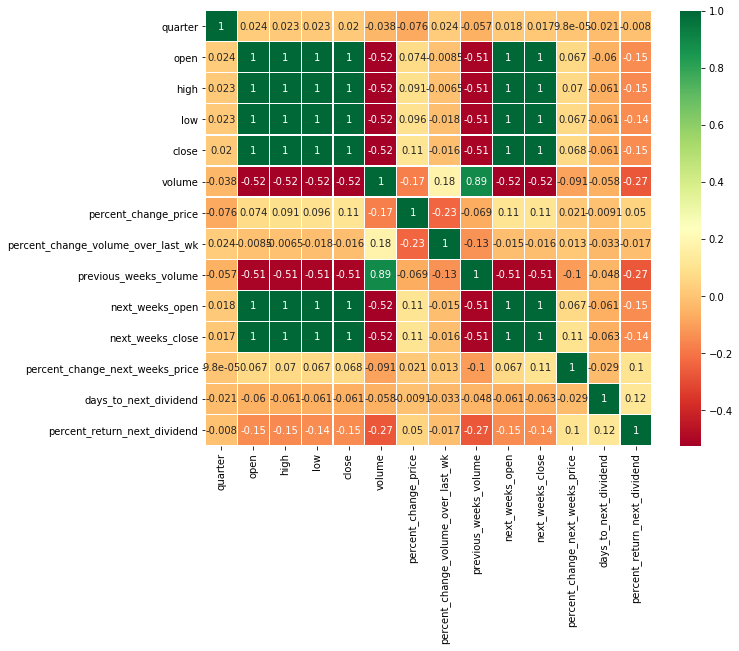

In [6]:
sns.heatmap(data_drop.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 

fig=plt.gcf() # fig에 접근
fig.set_size_inches(10,8) # fig그림 크기 조절
plt.show()

결측치를 제외한 data간의 heatmap 그려보았다.
그 결과 open, high, low, close, next_weeks_open, next_weeks_close 총 6개 변수들이 상관관계가 1로 매우 높은값이 나왔다
또한 결측치가 들어있던 previous_weeks_volume 변수는 volume 변수와 높은 상관을 가지고 있다.

피처들간 상관관계가 1으로 매우 높아 다중공선성을 줄이기위해 어떤 방법으로 분석을 해야할지 고민 해볼 필요가 있다.

In [7]:
pd.pivot_table(data_drop, index = 'stock', values = ['high', 'low', 'open', 'close'], aggfunc = 'mean')

,close,high,low,open
stock,,,,
AA,16.507917,17.027500,16.075417,16.595000
AXP,46.810417,47.650417,45.701250,46.620833
BA,73.617500,74.965833,71.878333,73.595000
BAC,13.001667,13.403333,12.735000,13.147500
CAT,103.544583,105.976250,100.313750,103.429167
CSCO,17.771250,18.342083,17.488333,18.025417
CVX,101.591667,103.416667,99.181667,101.265000
DD,53.003333,53.935000,51.513750,52.817500
DIS,41.324583,42.117083,40.425417,41.338333


가격변수들 간 상관이 너무 높아 실제 데이터들의 평균으로 값을 비교해보았다.
비슷한 가격을 가진 회사들도 있긴하지만 대체적으로 개별적인 값을 가지고 있음을 알수있다.

우리의 목표인 타겟값인 stock과의 상관관계를 알아보고자 한다.

이 과정에서 라벨인코딩을 사용하게 되면 수치로 인하여 상관관계에 영향을 줄수있다고 판단하여 라벨인코딩을 사용하였다.
이때 범주형변수 date는 제외하였다.

In [8]:
data_dummy = data_drop.drop(["date"],axis=1,inplace=False)
data_dummy.head()

,quarter,stock,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
1,1,AA,16.71,16.71,15.64,15.97,242963398,-4.428490,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,16.19,16.38,15.60,15.79,138428495,-2.470660,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,15.87,16.63,15.82,16.13,151379173,1.638310,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,16.18,17.39,16.18,17.14,154387761,5.933250,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029
5,1,AA,17.33,17.48,16.97,17.37,114691279,0.230814,-25.712195,154387761.0,17.39,17.28,-0.632547,90,0.172712


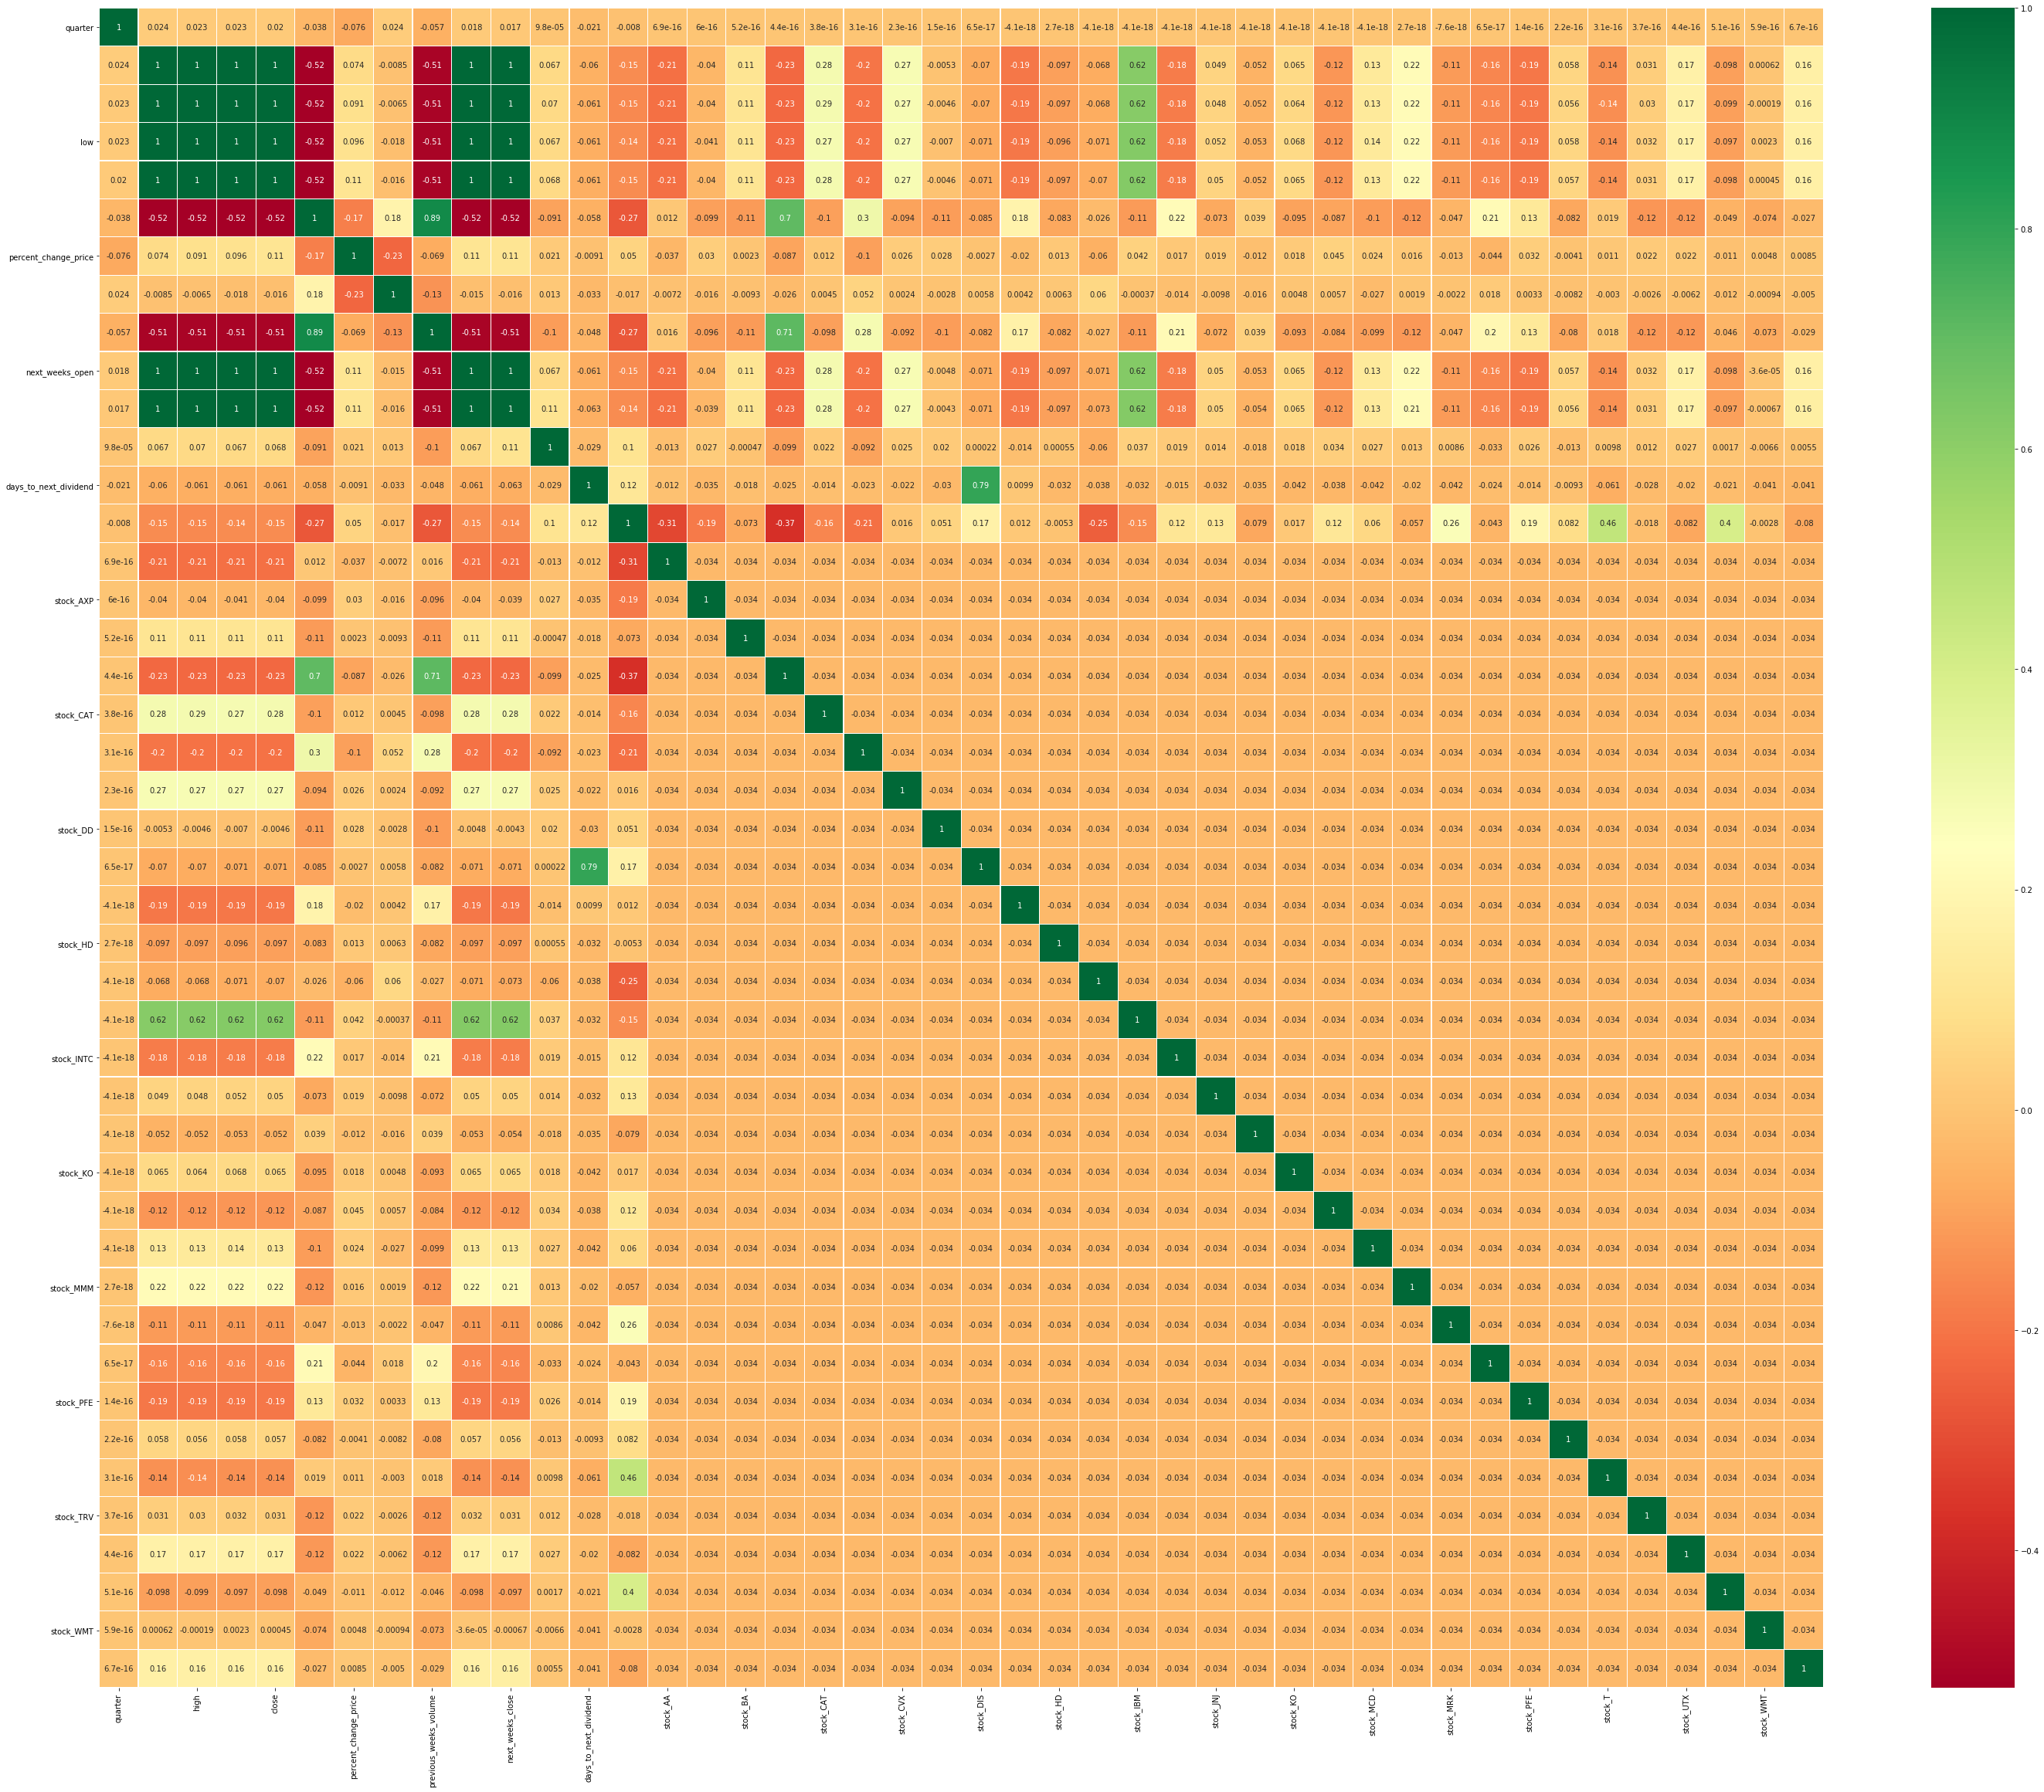

In [9]:
data_dummy = pd.get_dummies(data_dummy)

sns.heatmap(data_dummy.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 

fig=plt.gcf() # fig에 접근
fig.set_size_inches(50,40) # fig그림 크기 조절
plt.show()

라벨인코딩을 하여 각 변수별 상관관계를 살펴본 결과, 상관관계가 1이었던 변수들 중 low값이 그나마 각각의 stock과 높은 값을 가져 low값을 제외하고 나머지 변수들을 제거할것인지를 생각해본다. 

또한 previous_weeks_volume과 volume간 상관관계가 0.89로 높았다. 변수들 중 결측치가 없는 volume 변수를 선택하는 것을 생각해볼수있다. 

하지만 PCA방법으로 차원축소를 하는 방법도 있으므로 여러가지 가능성을 열어두자. percent_change_volume_over_last_wk 변수는 결측치에 어떤 데이터를 넣을지 각 변수들간의 관계나 도메인 지식을 활용하여 처리를 해주어야한다.

주식데이터에서 open, high, low, close값은 의미있는 피처값이라 판단되어 scale후 변수간 상관관계의 변화가 있는지 알아보았다.

In [10]:
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(data_drop[['open', 'high', 'low', 'close']])
data_scale = scaler.transform(data_drop[['open', 'high', 'low', 'close']])
data_scale=pd.DataFrame(data=data_scale,columns=data_drop[['open', 'high', 'low', 'close']].columns)

data_scale.head()

,open,high,low,close
0,-1.131237,-1.141611,-1.151237,-1.150557
1,-1.147119,-1.151510,-1.152479,-1.156028
2,-1.156892,-1.144011,-1.145650,-1.145694
3,-1.147424,-1.121211,-1.134475,-1.114996
4,-1.112300,-1.118511,-1.109953,-1.108006


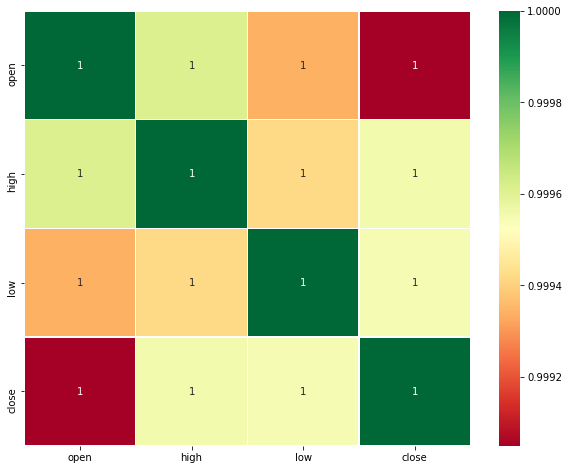

In [11]:
sns.heatmap(data_scale.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 

fig=plt.gcf() # fig에 접근
fig.set_size_inches(10,8) # fig그림 크기 조절
plt.show()

변화는 없었다. 하지만 이 변수들 간에 open과 high가 가장 상관이 높은걸 알수있었다.

## K-means

우리가 얻고자하는 target값인 stock은 데이터만 봤을때 가격만으로 분류가 될수도 있다고 판단하여 한 번 확인해보고자 한다.

In [12]:
data2 = data1.drop(['date','stock'], axis=1)
data2.head()

,quarter,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
1,1,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029


In [14]:
data_df= pd.DataFrame(data_drop[["high","close","open","low"]])
data_df

,high,close,open,low
1,16.71,15.97,16.71,15.64
2,16.38,15.79,16.19,15.60
3,16.63,16.13,15.87,15.82
4,17.39,17.14,16.18,16.18
5,17.48,17.37,17.33,16.97
...,...,...,...,...
745,82.63,82.63,80.22,80.07
746,83.75,81.18,83.28,80.18
747,81.87,79.78,80.93,79.72
748,80.82,79.02,80.00,78.33


In [15]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 1 to 749
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   high    720 non-null    float64
 1   close   720 non-null    float64
 2   open    720 non-null    float64
 3   low     720 non-null    float64
dtypes: float64(4)
memory usage: 28.1 KB


k-means는 수치형 자료만 적합되므로 전체 수치형 피처들, 해당주 지수 금액, low변수들 가지고 분류를 해 각각 비교해보았다.

In [34]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
data_df= pd.DataFrame(data_drop.drop(['date','stock'],axis=1))

n= len(data_drop['stock'].unique())
kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(data_df)
print(kmeans.labels_)

[28 19 16 16  0  0  0  0  0  0  0  3  3 15 15  3  3  3  3  3  3  3  3 22
  3  3 22 22 22  3 22  3  3 12 18  8  4 17  9  1 17 27 17 17 22 22  3  3
  3 22 22  3  3 15 15 19 16 11  2 13 23  7 20 20 25  7  3  3  3 15 15  3
 15 15 15 15 15  3  3  3  3  3  3  3  3  3  3  3 15  3  3 15 24 15 15 15
 15 15 15  2 10  5  7 28 19 11  2 20 25  7 15 15 15 15  3  3 15 15 15 15
 15 24 24 24 24 24 24 29 19  0  0  0 22 22  3  3 22 22 22 22 22  3  3  7
  2 20  2  2 28 11 20 20 20 26 15  3 24 24 15  3  3 15 15 15 15 19 16 16
 16 16 16 16 16 16 11 19  3  3 15 15 15 15 15 15 15 15 15 15  3  3  3  3
  3  3 15 15 15 15 24  3 15 15  3  3 22  3  3  3  3 22 22 22 22 22 22 22
 22 22 22 22 24  0  0  0 24 15 15  0  0 24 24  2 28 10  7 20  2 28 20  2
 20 26 26 19 11 20 26 16 16 11 28 10  7 15 15 15 24 15 15  3 15 15 15 15
 16 16 16 16  0  0 24  0  0 16 16 22 22 22  3 22 22 22 22 22 22 22 22 22
 22 22 22 22 22 22 22 22 22 16  0  0  0 24 24 15 24 24  0  0 15 15 15 24
 15 15 24 24 24 24 15 24 24  0  0  0 24  0  0  0  0

In [35]:
data_df= pd.DataFrame(data2[["high","close","open","low"]])

n= len(data_drop['stock'].unique())
kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(data_df)
print(kmeans.labels_)

[ 4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
 11 24 24 24 24 24 24 24 24 24 24 24 20 20 20 20 20 20 20 20 20 20 20 20
  0  0  0 21 21  9  9  9  9  9  9 28 12 12 12 12 12 12  4  4  4  4  4  4
  0  0  0  0 21 21 21  9  9  9  9 28 27 27 27 27 10 10 22 22 10 10 10 10
  8  8  8  8  8 17 17 17 17 17 17 17  4  4 12 12 12 12 12 12 12 12 12 12
 26 26 26  8  8  8  8  8  8  8 26  8  5  5  5  5  5 27 27  5 17 17 17 17
 18 18 18  3  3  3  3  3  3  3  3  3 12 12 12 12 12 12 12 12 12 12 12 12
 29 29 29  2  2  2  2  2  2  2  2  2 17  5  5  5  5  5  5  5  5  5  5  5
  1  1  1  1  1  1  1  1  1  1  1  1 29 29 29 29 29 29 29 29 29 11 29 29
 14 14 14 14 14 14 14 14 14 14 14 14 19 19 19 19 19  0  0  0  0  0  0  0
 26 26 23 23 23 23 23 23 23 23  1 23 15 15 15 15 15 15 15 15 25 25 25 25
  4  4  4  4  4 12 12  4 12 12 12 12 29 29 11 11 29 29 29 29 29  2  2  2
 15 15 15 15 15 15 15 15 15 15 15 15 22 10 22 22 22  2  2  2  2  2  2  2
  6  6  6 13 13 13 19 13 13 13  6 13 26 26 26 26 26

In [36]:
data_df= pd.DataFrame(data2[["low"]])

n= len(data_drop['stock'].unique())
kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(data_df)
print(kmeans.labels_)

[10 10 10 10 10 10 10 10 10 10 10 10 28  4  4 28 28  4  4 28 28 28 28  4
 25 25  9  9  9  9  9  9 25  9 25  9 18 18 18 18 18 18 18 18 18 18 18 18
 15 15 15 15  6  6 24  6 24  6  6 11  5  5  5  5  5  5  5 10 10 10 10 10
 27 27 15 15 15  6  6 24 24  6  6 24 19 19 19 19 19  8  8  8  8  8 19  8
 16 13 13 13 13 13 28 28 28 28 13 13 10  5 10  5  5  5  5  5  5  5  5  5
  7  7 16 16 16 16 16 16 16 16 16 16 28  4  4  4  4 19 19 28 28 28 13 28
 12 12 12 21 21  2  2 21 21 21 12 21  5  5  5  5  5  5  5  5  5  5  5  5
  0  0  0 17 17 17 17 17 17 17 17 17 28 28  4  4  4  4  4  4  4  4 28  4
 20 20 20 20 20 20 20 20 20 20 20 20  0  0  0  0  0  0  0  0  0 25  0  0
 29  9 29  9  9  9 29 29 29 29  9  9 23 23 23 23 23 23 27 27 27 27 23 27
 16  7  7  7  7  7  7 20  7  7 20 20  1  1  1  1  1  1  1  1 22 22 22 22
 10 10 10 10 10  5  5  5  5  5  5  5  0  0 25  0  0  0  0  0  0  0 17 17
  1  1  1  1  1  1  1  1  1  1  1  1  8  8  8  8  8 17 17 17 17 17 17 17
 14 14 14 14 14  3  3  3  3 14 29 14 16 16  7  7 16

$20 근처의 값이 몇 있어서 정확하게 분류를 하지는 못했지만 
해당 주 지수 금액 변수만으로도 각 회사간 전체적인 경향성은 가지고있음을 파악할 수 있다.

(본 데이터는 각 회사별 데이터를 기준으로 날자순으로 정렬이 되었다. 즉 11개씩 같은 회사,

전체 피처들을 넣어 비교할때는 결측치를 제외하고 분석하였다.)

전체 feature들을 넣어 GaussianMixture을 적합해보자

In [59]:
from sklearn.mixture import GaussianMixture
data_gmm = data_drop.drop(['date','stock'],axis=1)
gmm = GaussianMixture(n_components=30, random_state=0)
gmm_cluster_labels=gmm.fit(data_gmm).predict(data_gmm)
gmm_cluster_labels

array([19, 27,  9,  9, 16, 16, 11, 16, 11, 11, 16,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  6, 15,  1,  6,  6,  6,  6,  6, 15,  6,  7,
       28, 17, 26,  2,  5,  8, 23, 20,  2,  2,  6, 15, 15, 15,  6,  6, 15,
        6, 15, 15, 15, 27,  9, 19, 19, 12, 18, 10, 13, 13, 21, 10, 15,  6,
       15, 15, 15, 15, 15, 15, 15, 15, 15,  1,  1,  1,  1,  1,  1,  1,  1,
        1, 15,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0, 21, 22,
       10, 19, 27, 19, 13, 13,  3, 10,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, 16, 29, 29, 29, 29, 29,  9,  4, 16, 11, 16,  6,  6, 15,  6,
        6,  6,  6,  6,  6, 15, 15, 10, 27, 13,  0,  0, 27, 19, 13, 13, 13,
        0,  1,  1,  1, 29,  1,  1,  1,  1,  1,  1,  1, 27,  9,  4,  4,  9,
        4, 16,  9,  9,  9,  4,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, 15,  1, 15,  1,  1,  1, 29,  1, 15,  1, 15,  1,
        6, 15, 15, 15,  1,  6,  6,  6,  6,  6,  6, 15,  6,  6, 15,  6, 11,
       11, 16, 11, 16,  1

In [65]:
from sklearn.mixture import GaussianMixture
data_gmm = data2[['open','close','high','low']]
gmm = GaussianMixture(n_components=30, random_state=0)
gmm_cluster_labels=gmm.fit(data_gmm).predict(data_gmm)
gmm_cluster_labels

array([ 4, 20, 20,  4,  4, 20, 20, 12, 20, 12,  4,  4, 27, 27, 17,  5, 17,
       27, 27, 17, 27, 27, 17, 27, 11, 11, 11, 24, 11, 11, 24, 24, 24, 24,
       24, 11,  4,  4, 20, 20,  4,  4, 20, 20, 20,  4, 20, 20,  0,  0,  0,
       21, 21,  9,  9,  9,  9,  9,  9, 28,  4,  4, 20,  4, 12, 12, 20, 20,
       20, 20, 20, 20,  0,  0,  0,  0, 21, 21, 21, 21,  9,  9,  9, 28, 27,
       27,  5, 27, 27, 27, 10, 10, 10, 10, 10, 10, 27, 23, 27,  8, 27, 27,
       17, 17, 27, 17, 17, 27, 20, 20, 12,  4,  4,  4, 20, 12, 20,  4, 12,
        4,  8, 27, 26, 27,  8, 26, 26,  8, 26, 26,  8, 27, 27, 27, 27,  5,
       27, 27, 27,  5, 27, 17, 17, 27, 18, 18, 18,  3,  3,  3,  3,  3,  3,
        3,  3,  3, 20,  4, 20,  4,  4, 20,  4, 12,  4, 20, 20,  4,  2,  2,
        2,  2,  2,  2,  2,  2, 11,  2,  2,  2, 27, 27, 17,  5, 27, 27, 27,
       17,  5, 27, 17, 17, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       29,  2,  2,  2,  2, 11, 11,  2, 11,  2, 29, 11, 14, 24, 14, 14, 24,
       14, 14, 14, 14, 14

In [66]:
from sklearn.mixture import GaussianMixture
data_gmm = data2[['low']]
gmm = GaussianMixture(n_components=30, random_state=0)
gmm_cluster_labels=gmm.fit(data_gmm).predict(data_gmm)
gmm_cluster_labels

array([ 4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4, 19,  5,  5, 19, 19,
       19,  5, 19, 19, 19, 19,  5,  2, 27, 27, 27, 27, 27, 27, 27, 27, 27,
        2, 27, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26,  0,  0,  0,
        0, 18,  7,  7, 18,  7, 18,  7, 21, 12, 12, 12, 12, 12,  4,  4,  4,
        4,  4,  4,  4,  0,  0,  0,  0,  0, 18, 18,  7,  7, 18, 18,  7, 20,
       20, 20, 20, 20, 29, 29, 29, 29, 29, 29, 29,  9, 25, 25, 25, 25, 25,
       19, 25, 19, 19, 25, 25,  4,  4,  4, 12, 12, 12, 12, 12, 12, 12,  4,
       12, 16, 16, 23, 23, 23,  9,  9,  9, 23,  9, 23, 23, 19,  5,  5,  5,
        5, 20, 20, 19, 19, 25, 25, 25, 17, 17, 17,  3,  3, 14, 14,  3,  3,
        3, 17,  3, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 22, 22,
       22, 10, 10, 10, 10, 10, 10, 10, 10, 10, 19, 19, 19,  5,  5,  5,  5,
        5,  5,  5, 19,  5,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       22, 22, 22, 22, 22, 22, 22, 22,  2,  2, 22, 22, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11

In [ ]:
가우시안 혼합모델의 경우 n=30 작성시 low변수 하나만으로 군집을 시켰을 때가 가장 숫자가 연속적으로 나와 잘 군집이 되었다.
하지만 이 역시 완벽하게 구분을 한것은 아니었다.

In [67]:
from sklearn.cluster import DBSCAN
data_dbscan = data2[['close','low','high','open']]

dbscan = DBSCAN(eps=0.6, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(data_gmm)
dbscan_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  5, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 14,
       -1, -1, -1, 14,  3,  3,  3,  3,  3,  3,  3,  4, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  5,  5,
        5,  6,  6,  6,  6,  6,  6,  6, -1,  6,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  8,  8, -1,  8,  8,
        8, -1, -1,  8, -1

In [68]:
from sklearn.cluster import DBSCAN
data_dbscan = data2[['low']]

dbscan = DBSCAN(eps=0.6, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(data_gmm)
dbscan_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  5, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 14,
       -1, -1, -1, 14,  3,  3,  3,  3,  3,  3,  3,  4, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  5,  5,
        5,  6,  6,  6,  6,  6,  6,  6, -1,  6,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  8,  8, -1,  8,  8,
        8, -1, -1,  8, -1

In [69]:
from sklearn.cluster import DBSCAN
data_dbscan = data_drop.drop(['date','stock'],axis=1)

dbscan = DBSCAN(eps=0.6, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(data_gmm)
dbscan_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  5, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 14,
       -1, -1, -1, 14,  3,  3,  3,  3,  3,  3,  3,  4, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  5,  5,
        5,  6,  6,  6,  6,  6,  6,  6, -1,  6,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  8,  8, -1,  8,  8,
        8, -1, -1,  8, -1

밀도기반 클러스터링의 경우, 역시 지수변수들만으로도 완벽하지는 않지만 의미있는 군입을 만들어냈다.

이 때문에 어떤 변수를 만들어야하고 제거해야하는지, 지수가 아닌 거래량이나 등락률과 같은 다른 변수들은 군집에 있어서 방해만 되는 피처는 아닌지 이에 따라 각 피처들을 drop해야 하지 않겠는가 생각을 하였다. 하지만 각각의 피처에 대한 의미를 알지못해 어떤 변수를 제거하는 것이 맞는지 판단이 서지 않았다. 막연한 생각으로는 지수 변수만으로 집계하여 새로운 피처로 만들어 보면 어떨까하는 의문이 들긴 하였지만 그렇게 되면 머신러닝에서의 의미가 사라지게 된다.

따라서 이 데이터는 분류모델로써 적합하지 않다고 판단하여 여기서 마치길 제안한다.